In [46]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 25
             
prestopi = pd.read_csv('koncna.csv', sep = ';', encoding = 'cp1250', engine = 'python')
prestopi['cena'] = prestopi['cena'].str.replace(',','.')
prestopi['cena'] = prestopi['cena'].apply(pd.to_numeric)

prestopi = prestopi.replace(to_replace="1.feb", value="01/02")
prestopi = prestopi.replace(to_replace="2.mar", value="02/03")
prestopi = prestopi.replace(to_replace="3.apr", value="03/04")
prestopi = prestopi.replace(to_replace="4.maj", value="04/05")
prestopi = prestopi.replace(to_replace="5.jun", value="05/06")
prestopi = prestopi.replace(to_replace="6.jul", value="06/07")
prestopi = prestopi.replace(to_replace="7.avg", value="07/08")
prestopi = prestopi.replace(to_replace="8.sep", value="08/09")
prestopi = prestopi.replace(to_replace="9.okt", value="09/10")
prestopi = prestopi.replace(to_replace="10.nov", value="10/11")
prestopi = prestopi.replace(to_replace="11.dec", value="11/12")
prestopi = prestopi.replace(to_replace="dec.13", value="12/13")

prestopi['liga1'] = prestopi['liga1'].str.replace('Monaco','France')
prestopi['liga2'] = prestopi['liga2'].str.replace('Monaco','France')

prestopi['ime'] = prestopi['ime'].str.replace('ď','i')

prestopi['sezona'] = prestopi['sezona'].str.replace('97/98','1997/1998')
prestopi['sezona'] = prestopi['sezona'].str.replace('98/99','1998/1999')
prestopi['sezona'] = prestopi['sezona'].str.replace('99/00','1999/2000')
prestopi['sezona'] = prestopi['sezona'].str.replace('00/01','2000/2001')
prestopi['sezona'] = prestopi['sezona'].str.replace('01/02','2001/2002')
prestopi['sezona'] = prestopi['sezona'].str.replace('02/03','2002/2003')
prestopi['sezona'] = prestopi['sezona'].str.replace('03/04','2003/2004')
prestopi['sezona'] = prestopi['sezona'].str.replace('04/05','2004/2005')
prestopi['sezona'] = prestopi['sezona'].str.replace('05/06','2005/2006')
prestopi['sezona'] = prestopi['sezona'].str.replace('06/07','2006/2007')
prestopi['sezona'] = prestopi['sezona'].str.replace('07/08','2007/2008')
prestopi['sezona'] = prestopi['sezona'].str.replace('08/09','2008/2009')
prestopi['sezona'] = prestopi['sezona'].str.replace('09/10','2009/2010')
prestopi['sezona'] = prestopi['sezona'].str.replace('10/11','2010/2011')
prestopi['sezona'] = prestopi['sezona'].str.replace('11/12','2011/2012')
prestopi['sezona'] = prestopi['sezona'].str.replace('12/13','2012/2013')
prestopi['sezona'] = prestopi['sezona'].str.replace('13/14','2013/2014')
prestopi['sezona'] = prestopi['sezona'].str.replace('14/15','2014/2015')
prestopi['sezona'] = prestopi['sezona'].str.replace('15/16','2015/2016')
prestopi['sezona'] = prestopi['sezona'].str.replace('16/17','2016/2017')
prestopi['sezona'] = prestopi['sezona'].str.replace('17/18','2017/2018')
prestopi['sezona'] = prestopi['sezona'].str.replace('18/19','2018/2019')

prestopi = prestopi.sort_values('cena', ascending=False)
prestopi.head(20)

,ime,pozicija,starost,sezona,država,klub1,liga1,klub2,liga2,cena
0,Neymar,Left Wing,25,2017/2018,Brazil,FC Barcelona,Spain,Paris Saint-Germain,France,222.00
1,Philippe Coutinho,Attacking Midfield,25,2017/2018,Brazil,Liverpool FC,England,FC Barcelona,Spain,120.00
2,Ousmane Dembélé,Left Wing,20,2017/2018,France,Borussia Dortmund,Germany,FC Barcelona,Spain,105.00
3,Paul Pogba,Central Midfield,23,2016/2017,France,Juventus FC,Italy,Manchester United,England,105.00
4,Gareth Bale,Right Wing,24,2013/2014,Wales,Tottenham Hotspur,England,Real Madrid,Spain,101.00
5,Cristiano Ronaldo,Centre-Forward,24,2009/2010,Portugal,Manchester United,England,Real Madrid,Spain,94.00
6,Gonzalo Higuaín,Centre-Forward,28,2016/2017,Argentina,SSC Napoli,Italy,Juventus FC,Italy,90.00
7,Neymar,Left Wing,21,2013/2014,Brazil,Santos FC,Brazil,FC Barcelona,Spain,88.20
8,Romelu Lukaku,Centre-Forward,24,2017/2018,Belgium,Everton FC,England,Manchester United,England,84.70
9,Luis Suárez,Centre-Forward,27,2014/2015,Uruguay,Liverpool FC,England,FC Barcelona,Spain,81.72


### Pregled

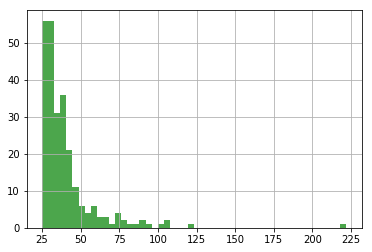

In [47]:
prestopi['cena'].hist(color='green', alpha=0.7, bins=50)

Vidimo, da so prestopi nad 50 milijonov evrov precej redki. Ta graf tudi pokaže, zakaj je letošnji prestop Neymarja za 222 milijonov evrov dvignil toliko prahu. 

In [48]:
po_pozicijah = prestopi.groupby('pozicija').agg({'pozicija':'size'})
po_pozicijah = po_pozicijah.reindex_axis(['pozicija'], axis=1)
po_pozicijah = po_pozicijah.rename_axis(None).reset_index()
po_pozicijah.columns = ['pozicija','št. igralcev',]
po_pozicijah.sort_values('št. igralcev', ascending = False)

,pozicija,št. igralcev
3,Centre-Forward,69
7,Left Wing,32
2,Centre-Back,31
0,Attacking Midfield,28
1,Central Midfield,28
10,Right Wing,20
4,Defensive Midfield,14
11,Right-Back,8
8,Left-Back,6
5,Keeper,5


Po pričakovanjih velike cene dosegajo igralci, ki so zadolženi predvsem za pripravo in doseganje golov. Nekoliko me je presenetila kar velika razlika med številom levih in desnih krilnih igralcev, na dnu pa so po pričakovanjih take oznake pozicij, ki se danes redko uporabljajo (desni branilec je desno krilo ali osrednji vezist).

In [49]:
po_starosti = prestopi.groupby('starost').agg({'starost':'size', 'cena':'mean'})
po_starosti = po_starosti.reindex_axis(['starost','cena'], axis=1)
po_starosti = po_starosti.rename_axis(None).reset_index()
po_starosti.columns = ['starost', 'št. igralcev','povprečna cena prestopa']
po_starosti

,starost,št. igralcev,povprečna cena prestopa
0,18,5,36.600000
1,19,7,35.400000
2,20,15,38.413333
3,21,15,39.737333
4,22,19,36.215789
5,23,35,38.880857
6,24,34,40.151471
7,25,34,42.495000
8,26,18,43.066667
9,27,32,41.689688


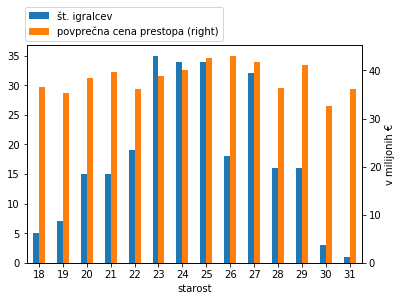

In [65]:
graf = po_starosti.plot(kind='bar', x='starost', secondary_y=['povprečna cena prestopa'], rot=0)
graf.right_ax.set_ylabel('v milijonih €')
graf.get_legend().set_bbox_to_anchor((0.6, 1.2))

Tukaj me je rezultat delno presenetil. V skladu z mojimi pričakovanji igralci najvišjo vrednost dosegajo okrog 25. leta. Pričakoval sem, da se bo tudi cena glede na starost spreminjala podobno kot se število prestopov, a vidimo, da je razlika komaj opazna. Mislim, da bi pričakovan graf dobili v primeru, da bi gledali vse prestope in ne zgolj najdražje. <br>
Nenavadno je tudi dokaj nizko število prestopov igralcev, starih 26 let. Vseeno se zdi, da gre tukaj za slučaj, saj so takrat v "najboljših nogometnih letih" in ni razloga, da klubi ne bi bili pripravljeni odšteti veliko denarja.

### Prestopi po ligah in klubih

In [66]:
po_ligah1 = prestopi.groupby('liga1').agg({'liga1':'size'})
po_ligah1 = po_ligah1.reindex_axis(['liga1'], axis=1)
po_ligah1 = po_ligah1.rename_axis(None).reset_index()
po_ligah1.columns = ['liga', 'št. igralcev']
po_ligah1 = po_ligah1.sort_values('št. igralcev', ascending = False)

po_ligah2 = prestopi.groupby('liga2').agg({'liga2':'size'})
po_ligah2 = po_ligah2.reindex_axis(['liga2'], axis=1)
po_ligah2 = po_ligah2.rename_axis(None).reset_index()
po_ligah2.columns = ['liga', 'št. igralcev']
po_ligah2 = po_ligah2.sort_values('št. igralcev', ascending = False)

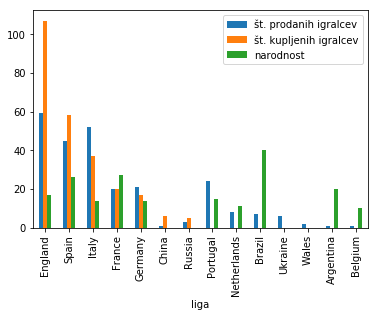

In [53]:
liga1 = po_ligah1
liga1.columns = ['liga', 'št. prodanih igralcev']
liga2 = po_ligah2
liga2.columns=['liga', 'št. kupljenih igralcev']

lige_združeno = pd.merge(liga1, liga2, how = 'outer', on='liga').sort_values('št. kupljenih igralcev', ascending = False)
#lige_združeno.plot(kind = 'bar', x = 'liga')
po_državah2 = prestopi.groupby('država').count()['ime'].sort_values(ascending = False).head(15)
po_državah2 = po_državah2.rename_axis(None).reset_index()
po_državah2.columns = ['liga', 'narodnost']

lige_združeno2 = pd.merge(lige_združeno, po_državah2, how = 'left', on='liga').sort_values('št. kupljenih igralcev', ascending = False)
lige_združeno2.plot(kind = 'bar', x = 'liga')

V skladu s pričakovanji si največ nakupov lahko privoščijo v Angliji, kjer je 6 ali 7 klubov, ki so lahko privoščijo take cene. V Španiji skorajda vse največje nakupe opravita Real Madrid in Barcelona, ostali jima ne morejo konkurirati, zato je tudi skupno število manjše. Poleg tega sta se ta kluba bolj osredotočala na najboljše (najdražje) igralce, tako da si jih niti nista mogla privoščiti toliko.<br>
Vidimo, da je v Angliji večina najboljših nogometašev iz tujine, saj sami nimajo dovolj res odličnih igralcev.<br>
V Nemčiji je en klub, ki je v vsem (slovesu, dosežkih, kadru, financah...) daleč pred ostalimi, to je Bayern Munchen. Posledica tega je, da si večina Nemcev želi igrati v Bayernu in zato Bayernu ni potrebno plačevati tolikšnih znesekov kot drugim največjim evropskim klubom. Ostali nemški klubi pa nimajo toliko sredstev, da bi prav pogosto kupovali igralce za 25 milijonov evrov in več.<br>
Tudi v Italiji se je prodalo opazno več igralcev kot se jih je kupilo. Posledično so se italijanski klubi z izjemo Juventusa v zadnjih letih slabo odrezali v evropskih tekmovanjih, tudi v državni ligi je Juventus zmagal že šestkrat zapored.
<br>
Na spodnjem grafu so za lažjo predstavo države, od koder prihajajo najdražji nogometaši, urejene po številu igralcev. 

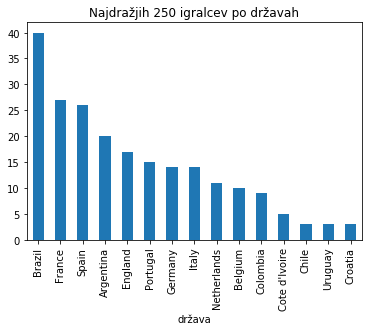

In [54]:
po_državah = prestopi.groupby('država').count()['ime'].sort_values(ascending = False).head(15)
po_državah.plot(kind="bar", title='Najdražjih 250 igralcev po državah')

In [55]:
po_klubih1 = prestopi.groupby('klub1').agg({'klub1':'size', 'cena':'sum'})
po_klubih1 = po_klubih1.reindex_axis(['klub1','cena'], axis=1)
po_klubih1 = po_klubih1.rename_axis(None).reset_index()
po_klubih1.columns = ['klub', 'št. igralcev','skupna vrednost prestopov']
po_klubih1.sort_values('št. igralcev', ascending = False).head(15)

,klub,št. igralcev,skupna vrednost prestopov
26,FC Porto,11,379.60
49,SL Benfica,10,328.50
69,Valencia CF,9,324.05
17,Chelsea FC,9,396.29
47,Real Madrid,8,355.50
4,AS Roma,8,251.40
11,Atlético Madrid,8,289.41
2,ACF Fiorentina,7,226.65
3,AS Monaco,7,343.50
34,Liverpool FC,7,417.52


Portugalska liga je znana po tem, da kupi in proda veliko igralcev. Eden od razlogov za to je, da se v Braziliji govori portugalsko, zato se veliko nadarjenih Brazilcev ob odhodu v Evropo odloči za Portugalsko. Drugi je, da imajo na Portugalskem sistem, da imajo lahko prodajne pravice za igralce podjetja, zato pogosto sofinancirajo prestope v Portugalske klube (v primeru prodaje dobijo ustrezen delež). Tretji pa je, da portugalski klubi niso tako dobri, da bi lahko redno konkurirali za zmago v Ligi prvakov, zato težko zadržijo najboljše igralce, poleg tega tudi finančno niso tako močni, da bi jih zadržali na tak način.<br>
Valencia je imela odlično ekipo, a jo je bila zaradi finančne krize prisiljena razprodati.

In [56]:
po_klubih2 = prestopi.groupby('klub2').agg({'klub2':'size', 'cena':'sum'})
po_klubih2 = po_klubih2.reindex_axis(['klub2','cena'], axis=1)
po_klubih2 = po_klubih2.rename_axis(None).reset_index()
po_klubih2.columns = ['klub', 'št. igralcev','skupna vrednost prestopov']
po_klubih2.sort_values('št. igralcev', ascending = False).head(15)

,klub,št. igralcev,skupna vrednost prestopov
25,Real Madrid,28,1180.90
19,Manchester City,26,1020.25
20,Manchester United,23,1011.03
8,Chelsea FC,23,833.70
11,FC Barcelona,19,929.57
22,Paris Saint-Germain,15,765.35
18,Liverpool FC,13,551.80
15,Juventus FC,11,458.58
6,Bayern Munich,11,374.00
0,AC Milan,8,269.50


Na vrhu so klubi, ki so že desetletja med najboljšimi na svetu (Real Madrid, Manchester United, FC Barcelona, Liverpool FC) in pa klubi, ki so v dobili nove, bogate lastnike in so med najboljšimi v Evropi šele v zadnjih letih ali pa se tja šele prebijajo (Manchester City, Chelsea, PSG, Everton). Vidimo tudi, da je kupovanje dragih igralcev skoraj nujno za doseganje dobrih rezultatov v Ligi prvakov. Od šestnajst klubov, ki so se uvrstili v osmino Lige prvakov, jih je namreč kar 10 na zgornjem seznamu (od tega vseh prvih 9).

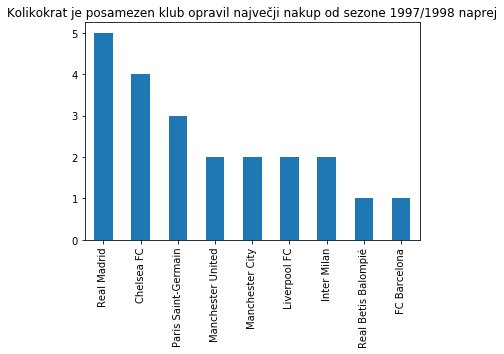

In [57]:
idx = prestopi.groupby(['sezona'])['cena'].transform(max) == prestopi['cena']
rekordi_leta = prestopi[idx].sort_values('sezona')
rekordi_leta[['sezona', 'liga2', 'klub2']].head(22)
rekordi_klubi = rekordi_leta.groupby('klub2')['ime'].count().sort_values(ascending = False)
graf = rekordi_klubi.plot(kind = 'bar', title = 'Kolikokrat je posamezen klub opravil največji nakup od sezone 1997/1998 naprej')
x_axis = graf.axes.get_xaxis()
x_axis.set_label_text('')
x_label = x_axis.get_label()
x_label.set_visible(False)

### Rekordi

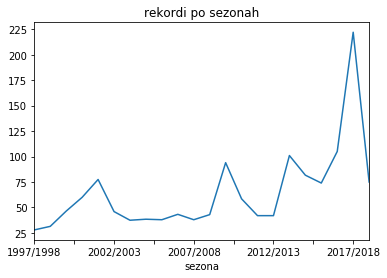

In [58]:
rekordi = prestopi.groupby('sezona')['cena'].max()
rekordi.plot(kind = 'line', title = 'rekordi po sezonah')

Vidimo, da so se velike spremembe začele dogajati šele v zadnjih petih letih. Predtem so bili veliki izdatki bolj izjeme (Real Mardid je v začetku stoletja gradil ekipo "galaktikov" in podobno želel narediti tudi po uspehih Barcelone med sezonami 2008/2009 in 2011/2012). Pomemben dejavnik za spremembe v zadnjih letih je, da se je izven Evrope, še posebaj v Severni Ameriki in na Kitajskem, močno povečala popularnost nogometa.

In [59]:
idx = prestopi.groupby(['sezona', 'liga2'])['cena'].transform(max) == prestopi['cena']
rekordi_sezona_liga = prestopi[idx].sort_values('sezona')
rekordi_sezona_liga = rekordi_sezona_liga.reset_index()
rekordi_sezona_liga = rekordi_sezona_liga[['sezona','liga2','cena']]

Text(0,0.5,'milijonov €')

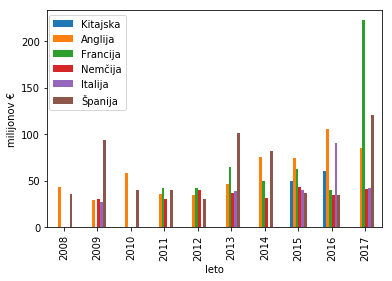

In [60]:
rekordi_sezona_liga_urejeno = rekordi_sezona_liga
rekordi_sezona_liga_urejeno['sezona'].replace(to_replace="\/\d{4}", value="", regex=True, inplace=True)
rekordi_sezona_liga_urejeno['sezona'] = rekordi_sezona_liga_urejeno['sezona'].astype('int')

rekordi_sezona_liga_urejeno = rekordi_sezona_liga.pivot_table(values='cena', index='sezona', columns="liga2")
rekordi_sezona_liga_urejeno = rekordi_sezona_liga_urejeno.rename_axis(None).reset_index()
rekordi_sezona_liga_urejeno.columns = ['leto', 'Kitajska', 'Anglija','Francija','Nemčija','Italija','Rusija','Španija']
rekordi_sezona_liga_urejeno = rekordi_sezona_liga_urejeno[['leto', 'Kitajska', 'Anglija','Francija','Nemčija','Italija','Španija']]
graf_rekordi = rekordi_sezona_liga_urejeno[(rekordi_sezona_liga_urejeno.leto > 2007) & (rekordi_sezona_liga_urejeno.leto < 2018)].plot(kind = 'bar', x='leto').legend(bbox_to_anchor=(0.25,1))
y_axis = graf_rekordi.axes.get_yaxis()
y_axis.set_label_text('milijonov €')

Vidimo, da se z leti povečuje tako višina najdražjih nakupov kot tudi njihova pogostost (pred več kot desetimi leti so bili transferji nad 50 milijonov redkost). <br>
V zadnjih letih se je močno povečalo vlaganje v nogomet na Kitajskem, kar se odraža v letih 2015 in 2016.  V začetku leta 2017 je tamkajšnja nogometna zveza uvedla 100% davek na igralce iz tujine, zato tam v bližnji prihodnosti ni za pričakovati velikih transferjev.<br>
Opazimo lahko tudi, da se Francija na grafu pojavi šele leta 2011, prav vsi francoski rekordi pa pripadajo PSG-ju. Klub so leta 2011 prevzeli lastniki iz Katarja in od takrat v klub vložili ogromno denarja. Podpisali so tudi že pogodbo za nakup novega igralca za prihodnjo sezono v vrednosti 170 milijonov evrov, a bodo plačali poleti, zato tega še ni mogoče opaziti na grafu.<br>
V Angliji se višina najvišjih prestopov pošvečuje predvsem zaradi vedno večjih prihodkov od televizijskih pravic (http://www.bbc.com/sport/football/41494042). Za pričakovati je, da bodo angleški klubi tudi v naslednjih letih pogosto plačali več kot 100 milijonov evrov za nakup igralca.

Text(0,0.5,'milijonov €')

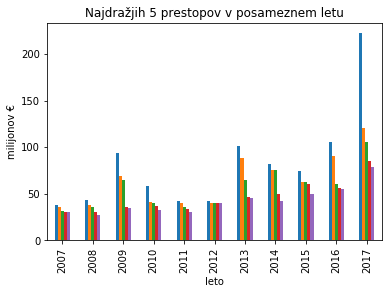

In [61]:
top5 = prestopi
top5['sezona'].replace(to_replace="\/\d{4}", value="", regex=True, inplace=True)
top5['sezona'] = top5['sezona'].astype('int')
top5 = top5.groupby('sezona')['cena'].apply(lambda grp: grp.nlargest(5))
top5 = top5.to_frame()
top5 = top5.reset_index(level=1, drop=True)
top5 = top5.rename_axis(None).reset_index()
top5.columns = ['sezona', 'cena']
top5 = top5[(top5.sezona >= 2007) & (top5.sezona < 2018)]
cene = top5['cena']

nov_index = pd.MultiIndex.from_product([['2007','2008','2009','2010','2011','2012', '2013', '2014', '2015', '2016', '2017'],
                                   ['1', '2', '3', '4', '5']],
                                   names = ['leto', 'številka'])
cene.index = nov_index

cene = cene.to_frame()
cene = cene.reset_index()
cene = cene.pivot_table(values='cena', index='leto', columns="številka")
cene = cene.reset_index()
graf_sezone = cene.plot(kind = 'bar', x = 'leto', legend = False, title = "Najdražjih 5 prestopov v posameznem letu")
y_axis = graf_sezone.axes.get_yaxis()
y_axis.set_label_text('milijonov €')


Vidimo, da se cene za najdražje nogometaše hitreje povečujejo šele v zadnjih letih. Istočasno postajajo večje tudi razlike med najdražjim in petim najdražjim prestopom. Iz tega grafa se tudi še enkrat vidi, kako zelo "nor" prestop je bil prestop Neymarja iz Barcelone v PSG. Kot je že zgoraj napisano, se tudi v prihodnosti obetajo ogromni prestopi, eden se zna zgoditi še ta mesec. Nogomet po svetu postaja vedno bolj priljubljen, kar pomeni še večje prihodke od televizijskih pravic, kar pomeni, da bodo prestopi nad 100 milijonov evrov verjetno vedno pogostejši.

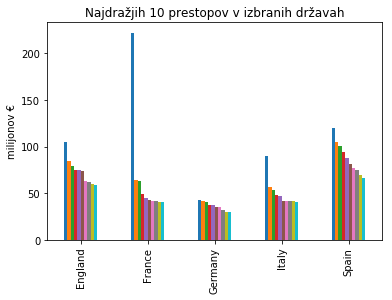

In [62]:
države = ['England','France','Germany','Italy','Spain']
top_lige = prestopi[prestopi['liga2'].isin(države)]
top_lige = top_lige.groupby('liga2')['cena'].apply(lambda grp: grp.nlargest(10))

števke = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
nov_index = pd.MultiIndex.from_product([države, števke], names = ['država', 'številka'])
top_lige.index = nov_index

top_lige = top_lige.to_frame()
top_lige = top_lige.reset_index()
top_lige = top_lige.pivot_table(values='cena', index='država', columns="številka")
top_lige = top_lige.reset_index()

graf_države = top_lige.plot(kind = 'bar', x = 'država', legend = False, title = "Najdražjih 10 prestopov v izbranih državah")

x_axis = graf_države.axes.get_xaxis()
y_axis = graf_države.axes.get_yaxis()
x_axis.set_label_text('')
y_axis.set_label_text('milijonov €')
x_label = x_axis.get_label()
x_label.set_visible(False)

Spodnji graf še bolj natančno kaže, da si angleški in španski klubi precej lažje privoščijo visoke odškodnine. V Italiji se je najdražji prestop zgodil, ko je Juventus za 105 milijonov € prodal Pogbaja in je zato lahko toliko plačal.

### Primerjava klubov med državami

Text(0,0.5,'')

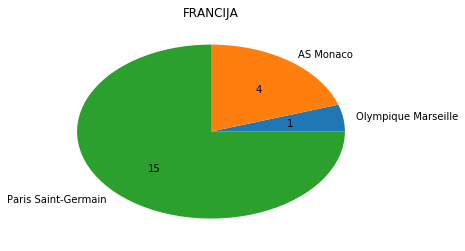

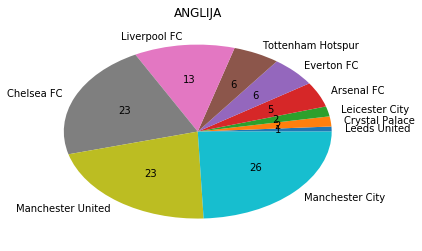

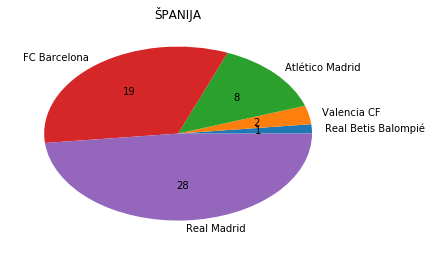

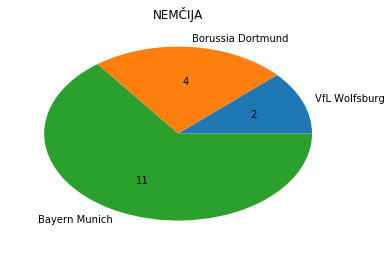

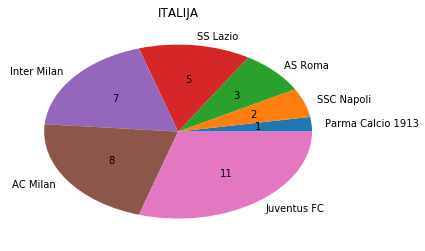

In [63]:
#funkcija, ki na grafe napiše točne številke
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

Francija = prestopi[prestopi['liga2'] == 'France'].groupby('klub2').count()['ime']
Francija = Francija.to_frame()
Francija = Francija.sort_values(by = 'ime')#, ascending = False)
Francija = Francija.reset_index()
Francija.columns = ['klub', 'št. nakupov']
Francija['št. nakupov'] = Francija['št. nakupov']
Francija.index = Francija['klub']

cifre = Francija['št. nakupov'].astype('int')
graf_Francija = Francija.plot(kind = 'pie', y = 'št. nakupov', autopct = make_autopct(cifre), legend = False, title = 'FRANCIJA')
y_axis = graf_Francija.axes.get_yaxis()
y_axis.set_label_text('')


Anglija = prestopi[prestopi['liga2'] == 'England'].groupby('klub2').count()['ime']
Anglija = Anglija.to_frame()
Anglija = Anglija.sort_values(by = 'ime')#, ascending = False)
Anglija = Anglija.reset_index()
Anglija.columns = ['klub', 'št. nakupov']
Anglija['št. nakupov'] = Anglija['št. nakupov']
Anglija.index = Anglija['klub']

cifre = Anglija['št. nakupov'].astype('int')
graf_Anglija = Anglija.plot(kind = 'pie', y = 'št. nakupov', autopct = make_autopct(cifre), legend = False, title = 'ANGLIJA')
y_axis = graf_Anglija.axes.get_yaxis()
y_axis.set_label_text('')


Španija = prestopi[prestopi['liga2'] == 'Spain'].groupby('klub2').count()['ime']
Španija = Španija.to_frame()
Španija = Španija.sort_values(by = 'ime')#, ascending = False)
Španija = Španija.reset_index()
Španija.columns = ['klub', 'št. nakupov']
Španija['št. nakupov'] = Španija['št. nakupov']
Španija.index = Španija['klub']

cifre = Španija['št. nakupov'].astype('int')
graf_Španija = Španija.plot(kind = 'pie', y = 'št. nakupov', autopct = make_autopct(cifre), legend = False, title = 'ŠPANIJA')
y_axis = graf_Španija.axes.get_yaxis()
y_axis.set_label_text('')


Nemčija = prestopi[prestopi['liga2'] == 'Germany'].groupby('klub2').count()['ime']
Nemčija = Nemčija.to_frame()
Nemčija = Nemčija.sort_values(by = 'ime')#, ascending = False)
Nemčija = Nemčija.reset_index()
Nemčija.columns = ['klub', 'št. nakupov']
Nemčija['št. nakupov'] = Nemčija['št. nakupov']
Nemčija.index = Nemčija['klub']

cifre = Nemčija['št. nakupov'].astype('int')
graf_Nemčija = Nemčija.plot(kind = 'pie', y = 'št. nakupov', autopct = make_autopct(cifre), legend = False, title = 'NEMČIJA')
y_axis = graf_Nemčija.axes.get_yaxis()
y_axis.set_label_text('')

Italija = prestopi[prestopi['liga2'] == 'Italy'].groupby('klub2').count()['ime']
Italija = Italija.to_frame()
Italija = Italija.sort_values(by = 'ime')#, ascending = False)
Italija = Italija.reset_index()
Italija.columns = ['klub', 'št. nakupov']
Italija['št. nakupov'] = Italija['št. nakupov']
Italija.index = Italija['klub']

cifre = Italija['št. nakupov'].astype('int')
graf_Italija = Italija.plot(kind = 'pie', y = 'št. nakupov', autopct = make_autopct(cifre), legend = False, title = 'ITALIJA')
y_axis = graf_Italija.axes.get_yaxis()
y_axis.set_label_text('')


Vidimo, da je v vseh največjih petih ligah nekaj klubov, ki so finančno veliko pred ostalimi. To je najbolj izrazito v Franciji in Nemčiji, kjer je za večino največjih prestopov zaslužen po en klub. V Španiji je v zadnjih letih Atletico sicer nekoliko bližje Barceloni in Real Madridu, toda kljub temu še daleč od njiju. Če pogledamo na lestvico angleške premier lige (http://www.skysports.com/premier-league-table, 13.1.2018) so na prvih štirih mestih ekipe, ki so največkrat kupile drage igralce (slučajno so trenutno celo v enakem vrstnem redu). Med vsemi klubi, ki so kupile igralca za več kot 25 milijonov evrov, sta Pamra Calcio 1913 in Leeds United edina kluba, ki trenutno ne igrata v prvi državni nogometni ligi. Velja pa tukaj omeniti, da se za take igralce le redko odločajo ekipe, ki se borijo za obstanek v najboljši ligi, poleg tega pa dobri igralci v take klube niti ne želijo prestopati, zato je tak rezultat pričakovan. 